In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

%matplotlib inline

In [ ]:
sns.set(style='darkgrid')
dataset = pd.read_csv('WineQT.csv')
# dataset https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [ ]:
dataset.info()

In [ ]:
dataset.head()

In [ ]:
#removing Id
dataset.drop('Id',axis=1,inplace=True)

In [ ]:
dataset['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

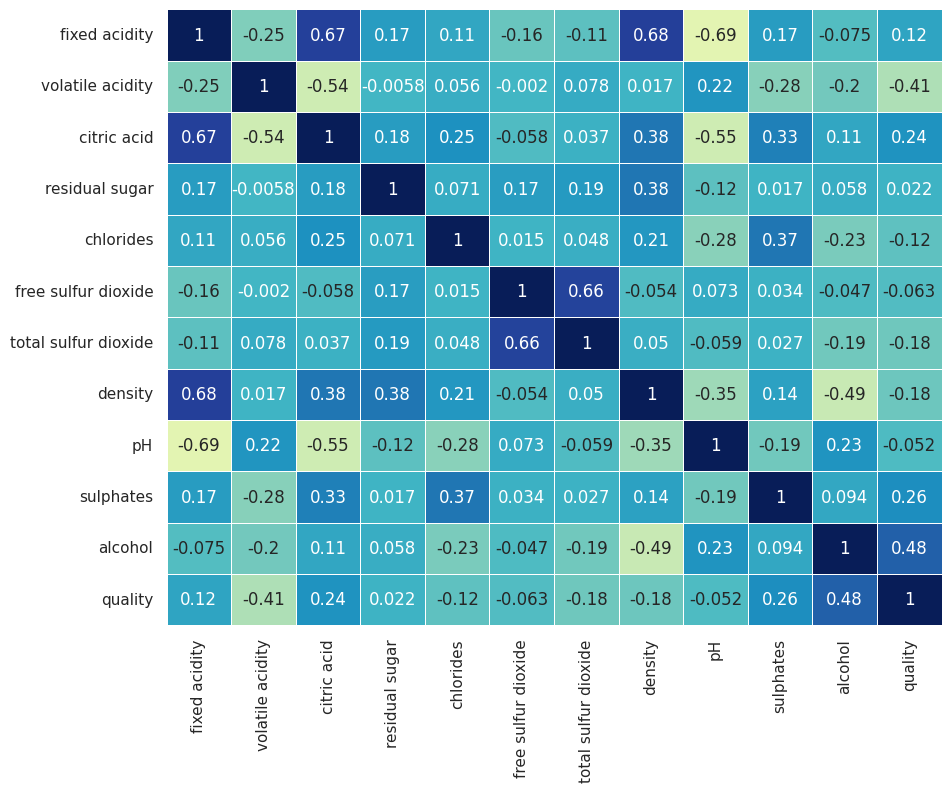

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
first_accuracy_train = accuracy_score(y_train,y_pred_train)

print("Accuracy train:", first_accuracy_train)

Accuracy train: 1.0


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

if(accuracy > .8):
  print('Good accuracy')
elif(accuracy < .5):
  print('Bad accuracy')
else:
  print('average accuracy, could be better')

Accuracy: 0.6584699453551912
average accuracy, could be better


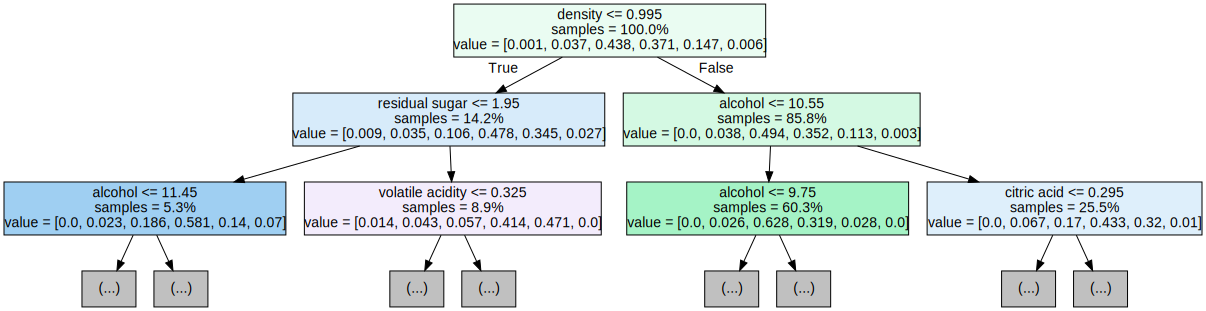

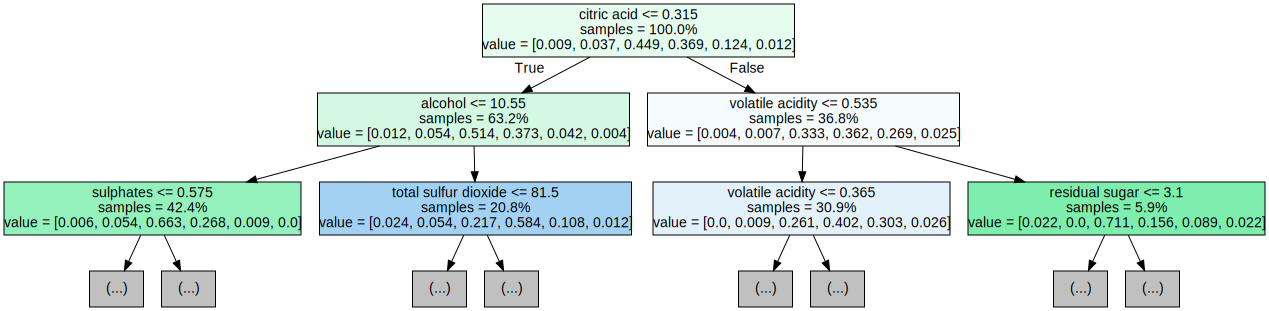

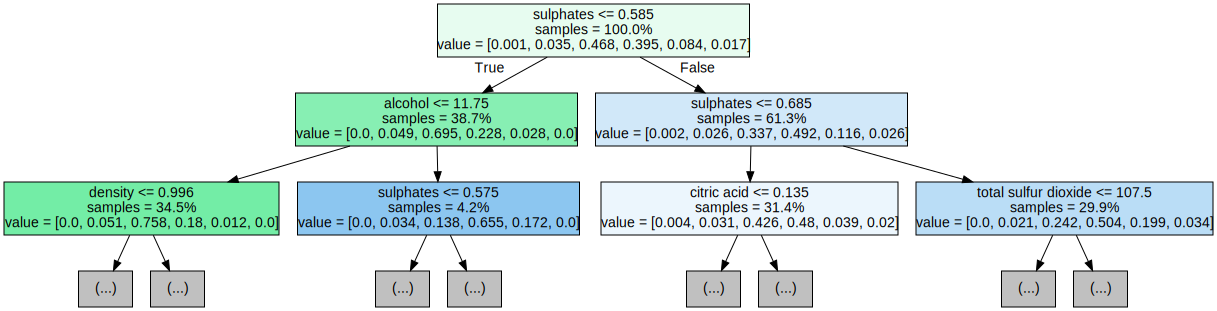

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
n_est_rand = randint(110,180)
m_dep_rand = randint(8,12)

#print('numeros = ',n_est_rand,m_dep_rand)

param_dist = {'n_estimators': n_est_rand,
              'max_depth': m_dep_rand}

# n_estimators = 160 / 
# max depth = 9 / 


# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=4)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


In [ ]:

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 134}


In [ ]:
# Create a new random forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators=rand_search.best_params_['n_estimators'], 
                                  max_depth=rand_search.best_params_['max_depth'])

# Train the model on the full training set
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy:', accuracy)

Test set accuracy: 0.6311475409836066


In [ ]:
y_pred = rand_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

if(accuracy > .8):
  print('Good accuracy')
elif(accuracy < .5):
  print('Bad accuracy')
else:
  print('average accuracy, could be better')

Accuracy: 0.6120218579234973
average accuracy, could be better


In [ ]:
X_fs = X[[
        "volatile acidity",
        "sulphates",
        "alcohol",
        ]]

Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fs, y, test_size=0.32, random_state=42, stratify=y)

In [ ]:
# criando random forest com novos valores de treinamento
rff = RandomForestClassifier()
rff.fit(Xf_train, yf_train)

In [ ]:
yf_pred = rff.predict(Xf_test)

accuracyf = accuracy_score(yf_test, yf_pred)
print("Accuracy:", accuracyf)

if(accuracyf > .8):
  print('Good accuracy')
elif(accuracyf < .5):
  print('Bad accuracy')
else:
  print('average accuracy, could be better')

Accuracy: 0.6284153005464481
average accuracy, could be better


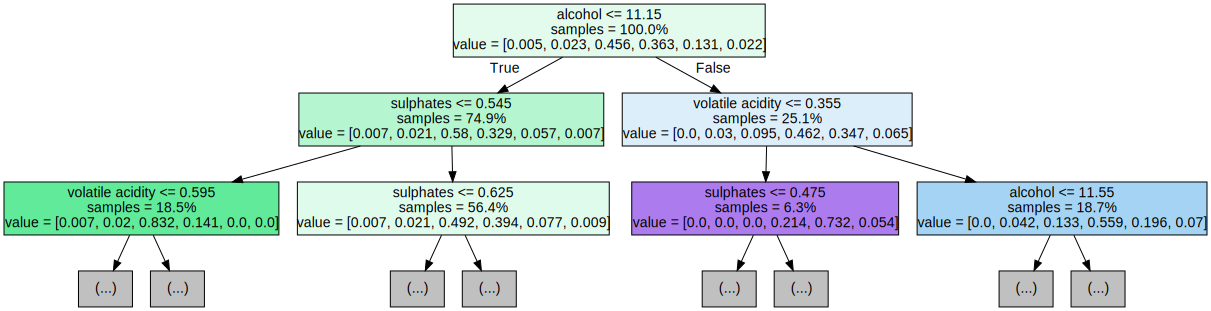

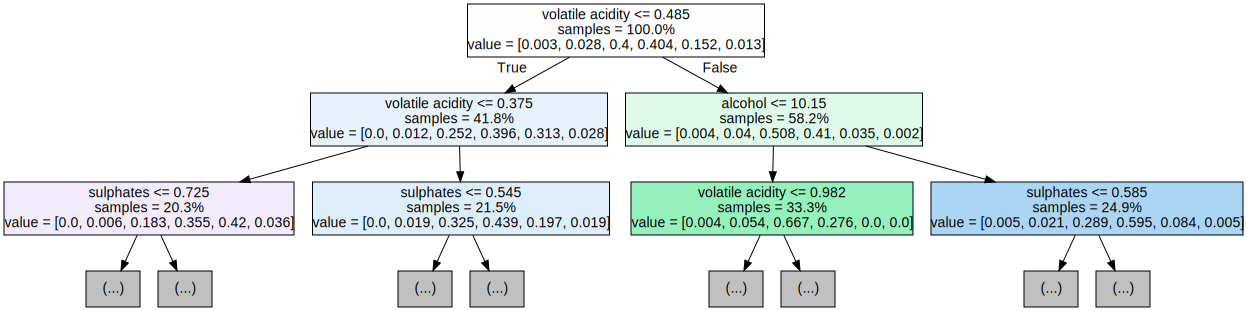

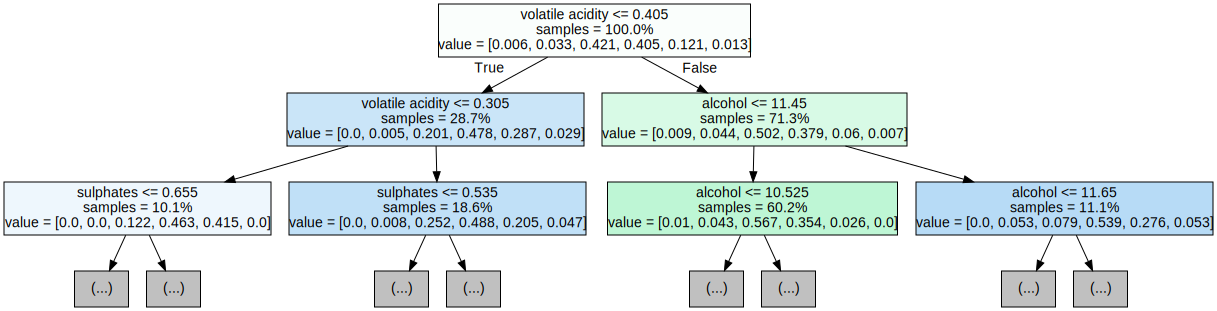

In [ ]:
for i in range(3):
    tree = rff.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Xf_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
n_est_randf = randint(110,180)
m_dep_randf = randint(8,12)

param_dist = {'n_estimators': n_est_randf,
              'max_depth': m_dep_randf}

# n_estimators = 160 / 
# max depth = 9 / 


# Create a random forest classifier
rff = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_searchf = RandomizedSearchCV(rff, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=4)

# Fit the random search object to the data
rand_searchf.fit(Xf_train, yf_train)

In [ ]:

# Create a variable for the best model
best_rff = rand_searchf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_searchf.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 137}


In [ ]:
# Create a new random forest classifier with the best hyperparameters
best_rff = RandomForestClassifier(n_estimators=rand_searchf.best_params_['n_estimators'], 
                                  max_depth=rand_searchf.best_params_['max_depth'])

# Train the model on the full training set
best_rff.fit(Xf_train, yf_train)

# Make predictions on the test set
yf_pred = best_rff.predict(Xf_test)

# Evaluate the model's performance
accuracyf = accuracy_score(yf_test, yf_pred)
print('Test set accuracy:', accuracyf)

Test set accuracy: 0.6420765027322405


In [ ]:
X["quality_bin"] = dataset["quality"].apply(lambda x: "good" if x>5 else "bad")
X['quality'] = dataset['quality']
dataset['quality_bin'] = X['quality_bin']


In [ ]:
X_bin = dataset.drop(['quality', "quality_bin"], axis=1)
y_bin = dataset['quality_bin']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

In [ ]:
rfb = RandomForestClassifier()
rfb.fit(Xb_train, yb_train)

In [ ]:
yb_train_pred = rfb.predict(Xb_train)

accuracyb_train = accuracy_score(yb_train,yb_train_pred)

print("Accuracy train:", accuracyb_train)

Accuracy train: 1.0


Accuracy: 0.8017492711370262
Good accuracy


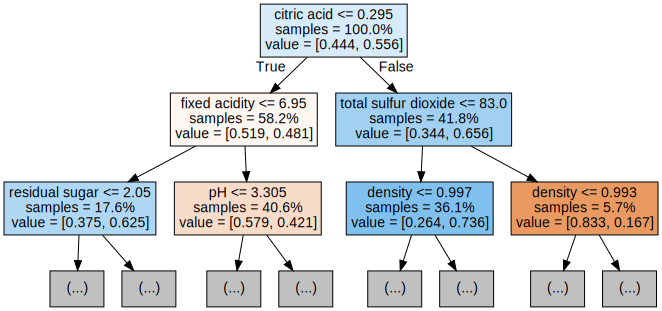

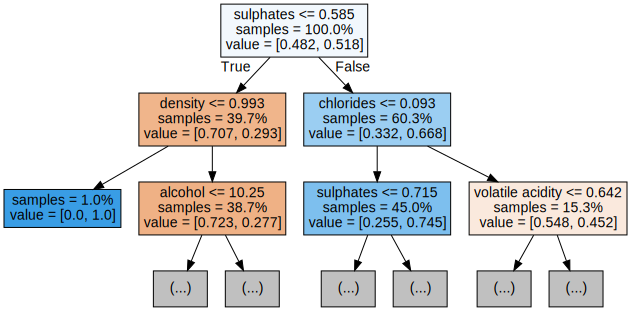

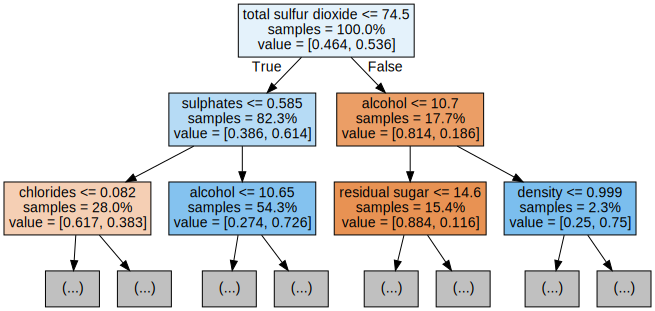

In [ ]:
yb_pred = rfb.predict(Xb_test)

accuracyb = accuracy_score(yb_test, yb_pred)
print("Accuracy:", accuracyb)

if(accuracyb > .9):
  print('Excelent accuracy')
elif(accuracyb > .75):
  print('Good accuracy')
elif(accuracyb < .5):
  print('Bad accuracy')
else:
  print('average accuracy, could be better')

for i in range(3):
    tree = rfb.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Xb_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
n_est_randfb = randint(110,180)
m_dep_randfb = randint(8,12)

param_dist = {'n_estimators': n_est_randfb,
              'max_depth': m_dep_randfb}

# n_estimators = 160 / 
# max depth = 9 / 


# Create a random forest classifier
rffb = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_searchfb = RandomizedSearchCV(rffb, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=4)

# Fit the random search object to the data
rand_searchfb.fit(Xb_train, yb_train)

In [ ]:
# Create a variable for the best model
best_rffb = rand_searchfb.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_searchfb.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 152}


In [ ]:
# Create a new random forest classifier with the best hyperparameters
best_rffb = RandomForestClassifier(n_estimators=rand_searchfb.best_params_['n_estimators'], 
                                  max_depth=rand_searchfb.best_params_['max_depth'])

# Train the model on the full training set
best_rffb.fit(Xb_train, yb_train)

# Make predictions on the test set
yfb_pred = best_rffb.predict(Xb_test)

# Evaluate the model's performance
accuracyfb = accuracy_score(yb_test, yfb_pred)
print('Test set accuracy:', accuracyfb)

Test set accuracy: 0.8075801749271136


In [ ]:
rffb.fit(Xb_train, yb_train)
yb_train_pred = rffb.predict(Xb_train)

accuracyb_train = accuracy_score(yb_train,yb_train_pred)

print("Accuracy train:", accuracyb_train)

Accuracy train: 1.0


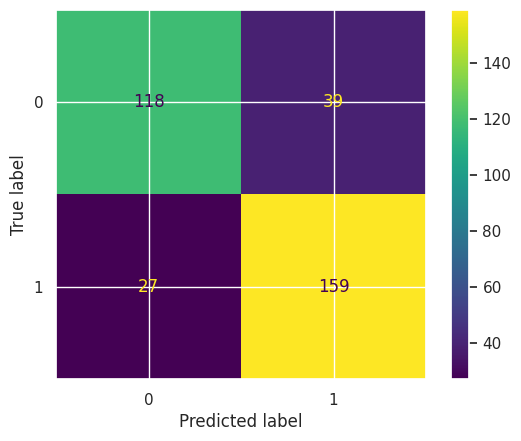

In [ ]:
# Generate predictions with the best model
yb_pred = best_rffb.predict(Xb_test)

# Create the confusion matrix
cm = confusion_matrix(yb_test, yb_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
Xb_fs = X_bin[[
        "volatile acidity",
        "sulphates",
        "alcohol",
        ]]


Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_fs, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

Accuracy: 0.7638483965014577
Good accuracy


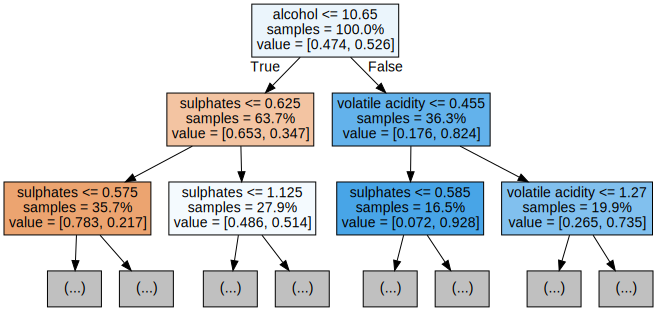

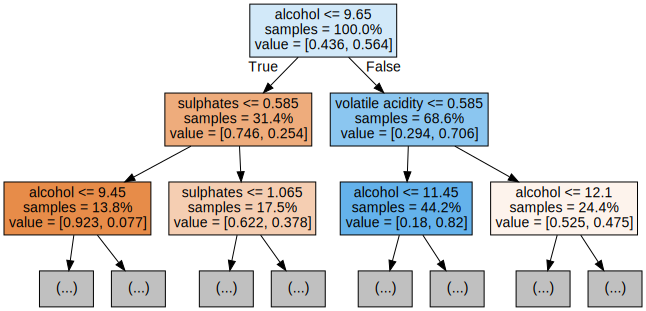

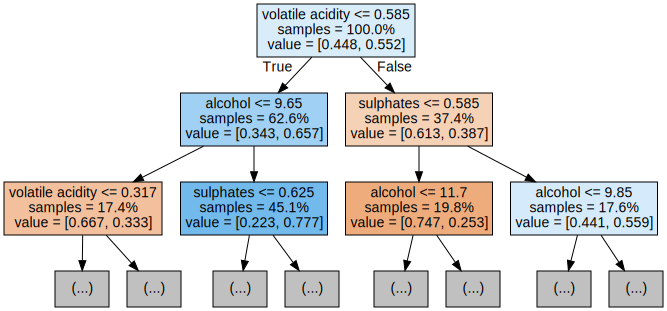

In [ ]:
rfbf = RandomForestClassifier()
rfbf.fit(Xb_train, yb_train)

yb_pred = rfbf.predict(Xb_test)

accuracybf = accuracy_score(yb_test, yb_pred)
print("Accuracy:", accuracybf)

if(accuracybf > .75):
  print('Good accuracy')
elif(accuracybf < .5):
  print('Bad accuracy')
else:
  print('average accuracy, could be better')

for i in range(3):
    tree = rfbf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Xb_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)